In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.6.0'

In [3]:
IMAGE_SIZE = [224, 224]
X= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'
y= '/content/drive/MyDrive/Colab Notebooks/Covid Dataset'

In [4]:
from sklearn.model_selection import train_test_split
X_train, y_train,X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Covid Dataset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 877 images belonging to 10 classes.


In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
cnn.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [18]:
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [19]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
28/28 [==============================] - 614s 21s/step - loss: 1.3136 - accuracy: 0.1642 - val_loss: 1.2647 - val_accuracy: 0.2873
Epoch 2/20
28/28 [==============================] - 75s 3s/step - loss: 1.2296 - accuracy: 0.3820 - val_loss: 1.1778 - val_accuracy: 0.4686
Epoch 3/20
28/28 [==============================] - 74s 3s/step - loss: 1.1634 - accuracy: 0.4709 - val_loss: 1.1223 - val_accuracy: 0.5633
Epoch 4/20
28/28 [==============================] - 74s 3s/step - loss: 1.1168 - accuracy: 0.5599 - val_loss: 1.0796 - val_accuracy: 0.6442
Epoch 5/20
28/28 [==============================] - 74s 3s/step - loss: 1.0827 - accuracy: 0.6157 - val_loss: 1.0656 - val_accuracy: 0.6431
Epoch 6/20
28/28 [==============================] - 74s 3s/step - loss: 1.0569 - accuracy: 0.6693 - val_loss: 1.0297 - val_accuracy: 0.7161
Epoch 7/20
28/28 [==============================] - 74s 3s/step - loss: 1.0399 - accuracy: 0.7092 - val_loss: 1.0322 - val_accuracy: 0.7206
Epoch 8/20
28/28 [

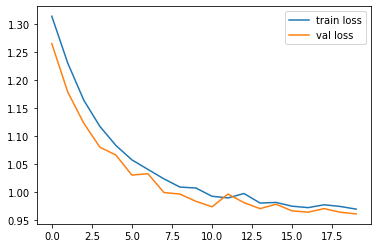

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

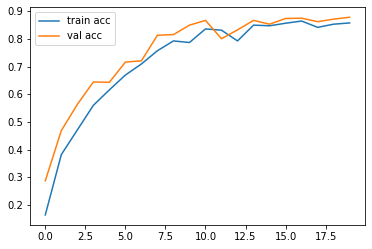

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

cnn.save('model_HYBRID.h5')

In [23]:
from tensorflow.keras.models import load_model
 

model = load_model('model_HYBRID.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal/NORMAL(1267).jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [26]:
result

array([[4.5042976e-05, 4.4367820e-07, 1.0224534e-08, 7.2822264e-09,
        9.9995422e-01, 1.9367439e-09, 8.4731830e-14, 5.3226234e-08,
        2.4592322e-07, 1.0615462e-08]], dtype=float32)

In [27]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
28/28 [==============================] - 77s 3s/step - loss: 0.9674 - accuracy: 0.8575 - val_loss: 0.9593 - val_accuracy: 0.8780
Epoch 2/20
28/28 [==============================] - 74s 3s/step - loss: 0.9668 - accuracy: 0.8632 - val_loss: 0.9591 - val_accuracy: 0.8769
Epoch 3/20
28/28 [==============================] - 74s 3s/step - loss: 0.9672 - accuracy: 0.8563 - val_loss: 0.9627 - val_accuracy: 0.8666
Epoch 4/20
28/28 [==============================] - 73s 3s/step - loss: 0.9693 - accuracy: 0.8495 - val_loss: 0.9574 - val_accuracy: 0.8791
Epoch 5/20
28/28 [==============================] - 73s 3s/step - loss: 0.9628 - accuracy: 0.8643 - val_loss: 0.9563 - val_accuracy: 0.8780
Epoch 6/20
28/28 [==============================] - 73s 3s/step - loss: 0.9625 - accuracy: 0.8712 - val_loss: 0.9577 - val_accuracy: 0.8746
Epoch 7/20
28/28 [==============================] - 73s 3s/step - loss: 0.9606 - accuracy: 0.8700 - val_loss: 0.9535 - val_accuracy: 0.8871
Epoch 8/20
28/28 [==

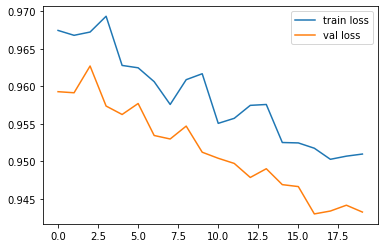

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

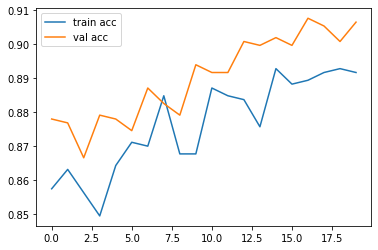

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model

cnn.save('model_HYBRID.h5')

In [31]:
from tensorflow.keras.models import load_model
 

model = load_model('model_HYBRID.h5')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal/NORMAL(1267).jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [34]:
result

array([[2.3145226e-07, 6.5535663e-05, 4.0780941e-07, 2.5375687e-07,
        9.9993360e-01, 4.8341487e-11, 7.6239470e-15, 6.5806866e-10,
        5.1912114e-08, 1.0326265e-10]], dtype=float32)

In [35]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
28/28 [==============================] - 74s 3s/step - loss: 0.9476 - accuracy: 0.8985 - val_loss: 0.9411 - val_accuracy: 0.9088
Epoch 2/20
28/28 [==============================] - 72s 3s/step - loss: 0.9467 - accuracy: 0.8997 - val_loss: 0.9438 - val_accuracy: 0.9065
Epoch 3/20
28/28 [==============================] - 72s 3s/step - loss: 0.9499 - accuracy: 0.8974 - val_loss: 0.9411 - val_accuracy: 0.9111
Epoch 4/20
28/28 [==============================] - 73s 3s/step - loss: 0.9451 - accuracy: 0.9065 - val_loss: 0.9393 - val_accuracy: 0.9145
Epoch 5/20
28/28 [==============================] - 73s 3s/step - loss: 0.9466 - accuracy: 0.8962 - val_loss: 0.9410 - val_accuracy: 0.9099
Epoch 6/20
28/28 [==============================] - 71s 3s/step - loss: 0.9451 - accuracy: 0.8985 - val_loss: 0.9428 - val_accuracy: 0.9088
Epoch 7/20
28/28 [==============================] - 71s 3s/step - loss: 0.9450 - accuracy: 0.9042 - val_loss: 0.9394 - val_accuracy: 0.9145
Epoch 8/20
28/28 [==

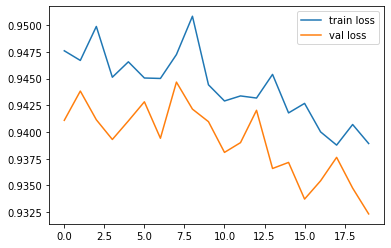

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

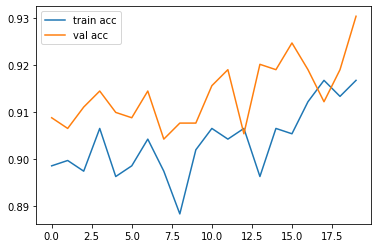

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from tensorflow.keras.models import load_model

cnn.save('model_HYBRID.h5')

In [39]:
from tensorflow.keras.models import load_model
 

model = load_model('model_HYBRID.h5')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal/NORMAL(1267).jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [42]:
result

array([[7.3422243e-06, 3.8244273e-04, 4.4503608e-07, 3.7049734e-08,
        9.9960834e-01, 2.5410163e-09, 2.9329975e-10, 2.6023206e-10,
        1.3769409e-06, 2.2830707e-10]], dtype=float32)

In [43]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
28/28 [==============================] - 76s 3s/step - loss: 0.9369 - accuracy: 0.9202 - val_loss: 0.9356 - val_accuracy: 0.9202
Epoch 2/20
28/28 [==============================] - 74s 3s/step - loss: 0.9432 - accuracy: 0.9031 - val_loss: 0.9405 - val_accuracy: 0.9076
Epoch 3/20
28/28 [==============================] - 73s 3s/step - loss: 0.9415 - accuracy: 0.9088 - val_loss: 0.9345 - val_accuracy: 0.9225
Epoch 4/20
28/28 [==============================] - 74s 3s/step - loss: 0.9342 - accuracy: 0.9282 - val_loss: 0.9304 - val_accuracy: 0.9327
Epoch 5/20
28/28 [==============================] - 74s 3s/step - loss: 0.9355 - accuracy: 0.9259 - val_loss: 0.9344 - val_accuracy: 0.9293
Epoch 6/20
28/28 [==============================] - 75s 3s/step - loss: 0.9373 - accuracy: 0.9236 - val_loss: 0.9366 - val_accuracy: 0.9179
Epoch 7/20
28/28 [==============================] - 74s 3s/step - loss: 0.9323 - accuracy: 0.9304 - val_loss: 0.9286 - val_accuracy: 0.9373
Epoch 8/20
28/28 [==

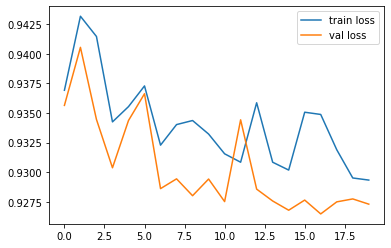

<Figure size 432x288 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

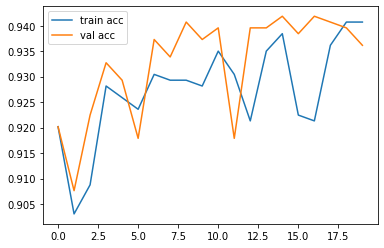

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
from tensorflow.keras.models import load_model

cnn.save('model_HYBRID.h5')

In [47]:
from tensorflow.keras.models import load_model
 

model = load_model('model_HYBRID.h5')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Covid Dataset/Normal/NORMAL(1267).jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [50]:
result

array([[6.8407036e-07, 6.0919438e-06, 2.9958599e-08, 2.7733716e-08,
        9.9999297e-01, 1.1837165e-09, 1.8328374e-09, 2.7796055e-11,
        1.6880301e-07, 4.5651884e-08]], dtype=float32)